<a href="https://colab.research.google.com/github/gomachinelearning/Blogs/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

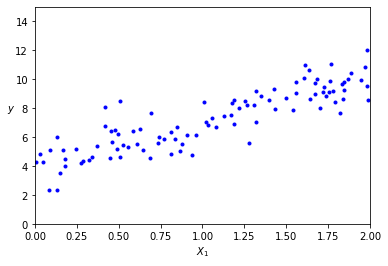

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y =  4 + 3 * X + np.random.randn(100,1)

plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel('$X_1$')
plt.ylabel('$y$',rotation=0)

plt.show()

In [2]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.96536365],
       [3.09325283]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
len(X_new), X_new.shape, theta_best.shape, X_new_b.shape
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96536365],
       [10.1518693 ]])

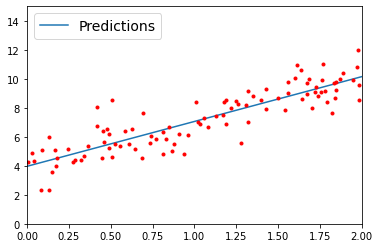

In [4]:
plt.clf()
plt.plot(X_new, y_predict, label='Predictions')
plt.legend(loc="upper left", fontsize=14)
plt.plot(X,y, 'r.')
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.coef_, lr.intercept_
lr.predict(X_new)

array([[ 3.96536365],
       [10.1518693 ]])

In [6]:
X.shape, X_b.shape

((100, 1), (100, 2))

In [7]:
eta = 0.1
n_iterations = 1000
m= 100
theta = np.random.rand(2,1)
theta_1 = theta

for i in range(n_iterations):
  gradient = (2/m) * X_b.T.dot((X_b.dot(theta) - y))
  theta= theta - eta*gradient
theta_1,theta

(array([[0.40049389],
        [0.11534468]]), array([[3.96536365],
        [3.09325283]]))

In [8]:
X_new_b.dot(theta)

array([[ 3.96536365],
       [10.1518693 ]])

<Figure size 432x288 with 0 Axes>

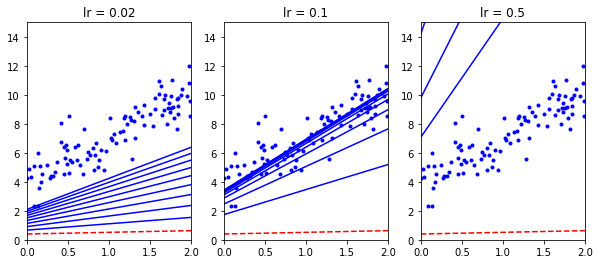

In [9]:
plt.clf()
bgd=[]
cost=[]
def plot_gradient_descent(theta, lr,theta_path=None, cost_iter=None):
  m = len(X_b)
  plt.plot(X,y,'b.')
  plt.axis([0,2,0,15])

  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    gradient = (2/m) * X_b.T.dot((X_b.dot(theta) - y))
    theta = theta - lr * gradient
    if theta_path is not None:
      theta_path.append(theta)
      cost_iter.append([iteration,np.sum(X_b.dot(theta) - y)])
    plt.title("lr = {}".format( lr))


plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plot_gradient_descent(theta_1, 0.02)
plt.subplot(1,3,2)
plot_gradient_descent(theta_1, 0.1,bgd, cost)
plt.subplot(1,3,3)
plot_gradient_descent(theta_1, 0.5)
plt.show()

In [10]:
cost[0:10]

[[0, -365.67863954878476],
 [1, -202.2102267519491],
 [2, -113.73600169031961],
 [3, -65.78880418782128],
 [4, -39.7444660665459],
 [5, -25.539443651892537],
 [6, -17.735855061017297],
 [7, -13.395257927011993],
 [8, -10.929763950296834],
 [9, -9.48124872468381]]

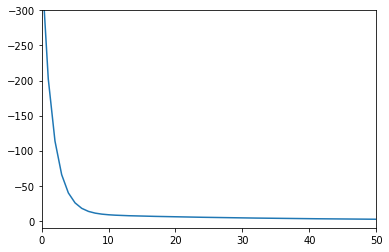

In [11]:
cost=np.array(cost)
cost.shape
#print(cost[:,1].reshape(-1,1).shape)
#plt.clf()
plt.axis([0,50,10,-300])
plt.plot(cost[:,0].reshape(-1,1), cost[:,1].reshape(-1,1))

In [12]:
theta

array([[3.96536365],
       [3.09325283]])

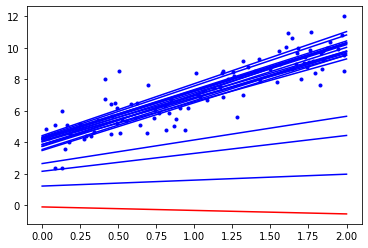

In [13]:
plt.clf()
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
plt.plot(X,y, "b.")
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict= X_new_b.dot(theta)
      style = "b-" if i>0 else 'r-'
      plt.plot(X_new,y_predict,style)
    random_index = np.random.randint(m)
    y_i = y[random_index:random_index+1]
    x_i = X_b[random_index: random_index + 1]
    gradient = 2 * x_i.T.dot((x_i.dot(theta) - y_i))
    lr  = learning_schedule(epoch * m + i)
    theta = theta - lr * gradient
  theta

In [14]:
theta

array([[3.99541506],
       [3.10922563]])

In [15]:
batch_size =20
epochs = 50
t=0
mgd=[]
cost_vs_iteration = []
t0, t1 = 200,1000
def learning_schedule(t):
    return t0 / (t + t1)
theta=np.random.randn(2,1)
for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)
  X_shuffled=X_b[shuffled_indices]
  y_shuffled=y[shuffled_indices]
  for batch in range(0,m,batch_size):
    t+=1
    X_batch = X_shuffled[batch:batch+batch_size]
    y_batch = y_shuffled[batch:batch+batch_size]
    gradient = (2/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
    cost_vs_iteration.append([t,np.sum(X_batch.dot(theta) - y_batch )])
    theta= theta-learning_schedule(t)*gradient
    mgd.append(theta)
theta


array([[3.95469732],
       [3.09827419]])

<Figure size 432x288 with 0 Axes>

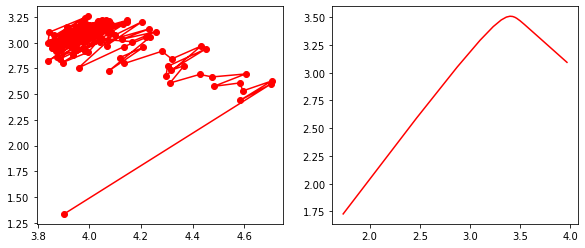

In [16]:
mgd=np.array(mgd)
bgd=np.array(bgd)

plt.clf()
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(mgd[:,0], mgd[:,1], 'r-o')
plt.subplot(1,3,2)
plt.plot(bgd[:,0], bgd[:,1], 'r-')

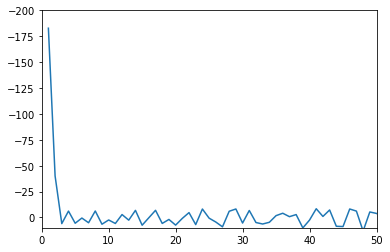

In [17]:
cost_vs_iteration=np.array(cost_vs_iteration)
#cost_vs_iteration.shape
#cost_vs_iteration[:,0].reshape(-1,1).shape ,cost_vs_iteration[:,1].reshape(-1,1).shape
#cost_vs_iteration[:,0].reshape(-1,1)
cost_vs_iteration[:,1].reshape(-1,1)
#print(cost[:,1].reshape(-1,1).shape)
#plt.clf()
plt.axis([0,50,10,-200])
plt.plot(cost_vs_iteration[:,0].reshape(-1,1), cost_vs_iteration[:,1].reshape(-1,1))